In [1]:
#Basic import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## **1. What is our independent variable? What is our dependent variable?**
The independent variable is whether the word is congruent or incongruent.<br>
The dependent variable is time is takes to name the ink colors.

## **2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.**

1. $H_{0}: \mu_{\bar{x}} = \mu_{\bar{y}}$
2. The null hypothesis ($H_{0}$) states that there is no difference between incongruent and congruent population mean times.
3. $\mu_{\bar{x}}$ denotes incongruent population mean and $\mu_{\bar{y}}$ denotes congruent population mean.


1. $H_{a}: \mu_{\bar{x}} \neq \mu_{\bar{y}}$
2. The alternative hypothesis ($H_{a}$) states that there is a difference between incongruent and congruent population mean times.
3. $\mu_{\bar{x}}$ denotes incongruent population mean and $\mu_{\bar{y}}$ denotes congruent population mean.

I will perform a dependent t-test since the same subject is taking a test based on the same number of congruent and incongruent words, there is a small sample size $(n<30)$, and the population standard deviation is unknown.

## **3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.**

In [2]:
#Read the data into a dataframe
data = pd.read_csv('stroopdata.csv')

In [3]:
#Calculate mean, median, and the variance of the congruent words
con_me = data['Congruent'].mean()
con_med = data['Congruent'].median()
con_var = data['Congruent'].var()
print("For the congruent words: the mean is %.2f, the median is %.2f, and the variance is %.2f." % (con_me, con_med, con_var))

For the congruent words: the mean is 14.05, the median is 14.36, and the variance is 12.67.


In [4]:
#Calculate mean, median, and the variance of the incongruent words
inc_me = data['Incongruent'].mean()
inc_med = data['Incongruent'].median()
inc_var = data['Incongruent'].var()
print("For the incongruent words: the mean is %.2f, the median is %.2f, and the variance is %.2f." % (inc_me, inc_med, inc_var))

For the incongruent words: the mean is 22.02, the median is 21.02, and the variance is 23.01.


## **4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.**
From the plots below, it definitely appears that the congruent data has a more normalized distribution. 

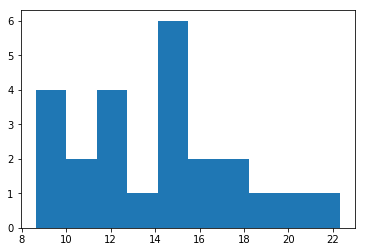

In [5]:
#Plot histogram of congruent times
plt.hist(data.Congruent, bins=10);

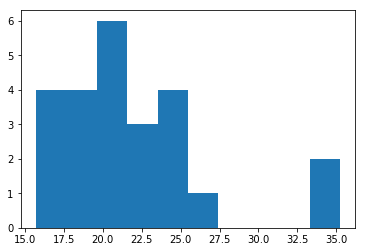

In [6]:
#Plot histogram of incongruent times
plt.hist(data.Incongruent, bins=10);

## 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

**Calculation of the t-statistic**
# $t = \frac{\mu_{\bar{x}} - \mu_{\bar{y}}}{\frac{S}{\sqrt{n}}}$

In [7]:
#Calculate a new column for the differences
data['diff'] = data.Congruent - data.Incongruent

In [8]:
data.head()

,Congruent,Incongruent,diff
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


**Calculate the t-statistic by dividing the means of both samples by the quotient of the standard deviation
and the squareroot of the sample size**

In [9]:
t_stat = (con_me - inc_me)/(data['diff'].std()/np.sqrt(len(data)))
print("The t-statistic is %.2f." % t_stat)

The t-statistic is -8.02.


**For an $\alpha$ of .05 (.025 for two-tail) with 23 degrees of freedom the t-critical value is 2.06866.**<br>
**For an $\alpha$ of .01 (.005 for two-tail) with 23 degrees of freedom the t-critical value is 2.80734.**<br>
**For an $\alpha$ of .005 (.0005 for two-tail) with 23 degrees of freedom the t-critical value is 3.7676.**

### This means that for all three values of $\alpha$ the null hypothesis should be rejected and there is a significant difference between the congruent and incongruent population means.
### This result matches my expected outcome.

## 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

**Human brains encode some things more easily than others. For instance, when creating a chart, it is better to use color for categorical encoding than shapes. The Stroop effect demonstrates this by showing a dissonance between the shape (letter) and color encodings.**
**This phenomenon should be observed in any task that forces the acknowledgement of the least immediate encoding. For instance, performing this experiment spatially with arrows pointing in a certain direction, but the individual must name a quadrant instead of the direction of the arrow.**